# importing the libraries

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
pip install -q keras

In [4]:
import keras

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading the directories 

In [6]:
# loading the directories 
training_dir = '/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Traning Set'
validation_dir = '/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Validation Set'
test_dir = '/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Test Set'

In [7]:
# useful for getting number of files
image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')
valid_image_files2 = glob(test_dir + '/*/*.jp*g')

In [8]:
# getting the number of classes i.e. type of fruits
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [9]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [224, 224]

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Image Augmentation

In [11]:
# Image Augmentation

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 and 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 20, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 20, shuffle=False, class_mode='categorical', subset='validation')


Found 2132 images belonging to 2 classes.
Found 630 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [12]:
# The labels are stored in class_indices in dictionary form. 
# checking the labels
training_generator.class_indices

{'Normalface': 0, 'Strokeface': 1}

In [13]:
history = model.fit(training_generator, epochs=10, validation_data=validation_generator) 

Epoch 1/10
11/11 [==============================] - 463s 40s/step - loss: 0.6436 - accuracy: 0.7425 - val_loss: 0.2218 - val_accuracy: 0.9143
Epoch 2/10
11/11 [==============================] - 44s 4s/step - loss: 0.1455 - accuracy: 0.9432 - val_loss: 0.0716 - val_accuracy: 0.9746
Epoch 3/10
11/11 [==============================] - 44s 4s/step - loss: 0.0916 - accuracy: 0.9695 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 4/10
11/11 [==============================] - 44s 4s/step - loss: 0.0614 - accuracy: 0.9761 - val_loss: 0.0466 - val_accuracy: 0.9873
Epoch 5/10
11/11 [==============================] - 45s 4s/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 6/10
11/11 [==============================] - 44s 4s/step - loss: 0.0424 - accuracy: 0.9845 - val_loss: 0.0368 - val_accuracy: 0.9921
Epoch 7/10
11/11 [==============================] - 45s 4s/step - loss: 0.0371 - accuracy: 0.9855 - val_loss: 0.0391 - val_accuracy: 0.9921
Epoch 8/10
11/11 [

### **Result**

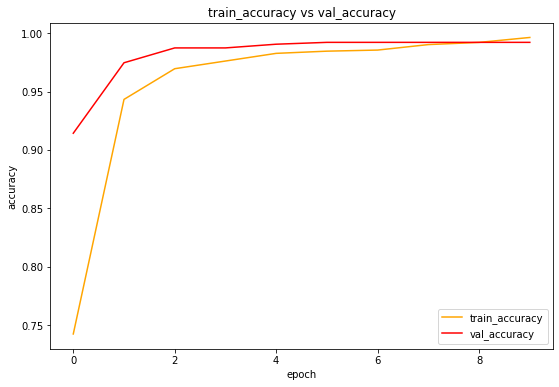

In [14]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(history.history['accuracy'], color='orange')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('train_accuracy vs val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

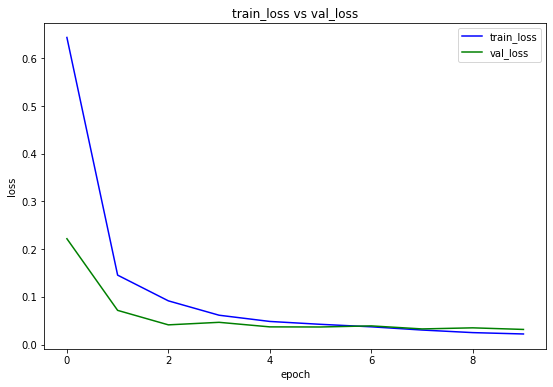

In [15]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')
plt.title('train_loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [16]:
scores = model.evaluate(test_generator)
print(" Test Accuracy = ", scores[1])

5/5 [==============================] - 18s 4s/step - loss: 0.0152 - accuracy: 1.0000
 Test Accuracy =  1.0


In [23]:
from keras.models import load_model
from tensorflow import keras

In [24]:
save_model = model.save("vgg16.h5")

In [26]:
Normalface = []
Strokeface = []

In [27]:
new_model = load_model("vgg16.h5")

In [33]:
import glob
from keras.preprocessing import image

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

for f in glob.glob(r'/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Test Set/Normalface/*.jpg') :
      
    # image path
    
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
           new_image = load_image(f)

    # check prediction
           pred = model.predict(new_image)
           Normalface.append(pred)

In [34]:
Normalface = np.array(Normalface)

In [35]:
Normalface

array([[[9.98287380e-01, 1.71266031e-03]],

       [[9.99894977e-01, 1.04995546e-04]],

       [[9.98441875e-01, 1.55810569e-03]],

       [[9.99833703e-01, 1.66282160e-04]],

       [[9.99868512e-01, 1.31473338e-04]],

       [[9.99692559e-01, 3.07461858e-04]],

       [[9.55380201e-01, 4.46197875e-02]],

       [[9.76836383e-01, 2.31635943e-02]],

       [[9.97642696e-01, 2.35727779e-03]],

       [[9.78119493e-01, 2.18804609e-02]],

       [[9.91253197e-01, 8.74681026e-03]],

       [[9.98706698e-01, 1.29332300e-03]],

       [[9.97635484e-01, 2.36445642e-03]],

       [[9.91896689e-01, 8.10334180e-03]],

       [[9.99687552e-01, 3.12457909e-04]],

       [[9.99887228e-01, 1.12769951e-04]],

       [[9.96893644e-01, 3.10635683e-03]],

       [[9.99816835e-01, 1.83236203e-04]],

       [[9.98157084e-01, 1.84294174e-03]],

       [[9.99448597e-01, 5.51371777e-04]],

       [[9.99613225e-01, 3.86795960e-04]],

       [[9.98519361e-01, 1.48065609e-03]],

       [[9.37574565e-01, 6.24254

In [36]:
Normalface = np.reshape(Normalface, (192, 2))

In [37]:
Normalface

array([[9.98287380e-01, 1.71266031e-03],
       [9.99894977e-01, 1.04995546e-04],
       [9.98441875e-01, 1.55810569e-03],
       [9.99833703e-01, 1.66282160e-04],
       [9.99868512e-01, 1.31473338e-04],
       [9.99692559e-01, 3.07461858e-04],
       [9.55380201e-01, 4.46197875e-02],
       [9.76836383e-01, 2.31635943e-02],
       [9.97642696e-01, 2.35727779e-03],
       [9.78119493e-01, 2.18804609e-02],
       [9.91253197e-01, 8.74681026e-03],
       [9.98706698e-01, 1.29332300e-03],
       [9.97635484e-01, 2.36445642e-03],
       [9.91896689e-01, 8.10334180e-03],
       [9.99687552e-01, 3.12457909e-04],
       [9.99887228e-01, 1.12769951e-04],
       [9.96893644e-01, 3.10635683e-03],
       [9.99816835e-01, 1.83236203e-04],
       [9.98157084e-01, 1.84294174e-03],
       [9.99448597e-01, 5.51371777e-04],
       [9.99613225e-01, 3.86795960e-04],
       [9.98519361e-01, 1.48065609e-03],
       [9.37574565e-01, 6.24254569e-02],
       [9.81958210e-01, 1.80417113e-02],
       [9.953590

In [39]:
from sklearn.metrics import classification_report

y_true = test_generator.classes

In [40]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)